# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Anel Fuad Abiyyu
- **Email:** anel.rhx@gmail.com
- **ID Dicoding:** abiyyuanel

## Menentukan Pertanyaan Bisnis

- Bagaimana korelasi antara jumlah ulasan produk dan tingkat kepuasan pelanggan di setiap kategori produk dalam satu tahun terakhir?
- Apakah ada pola yang signifikan dalam metode pembayaran tertentu yang memengaruhi jumlah pembelian pada bulan-bulan tertentu?
- Kategori produk mana yang memiliki waktu pengiriman tercepat dan bagaimana hal ini memengaruhi jumlah penjualan per kategori dalam enam bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv('customers_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')
order_review_df = pd.read_csv('order_reviews_dataset.csv')
orders_df = pd.read_csv('orders_dataset.csv')
products_df = pd.read_csv('products_dataset.csv')
order_payments = pd.read_csv('order_payments_dataset.csv')

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- customers_dataset.csv: Informasi tentang pelanggan.
- order_reviews_dataset.csv: Informasi ulasan dari pelanggan.
- orders_dataset.csv: Informasi terkait pesanan pelanggan.
- order_items_dataset.csv: Informasi terkait detail barang dalam pesanan.
- products_dataset.csv : Infomrasi terkait detail product berisi kategori dan nama yang dibeli pelanggan
- order_payments.csv : Informasi terkait detail pembayaran yang dilakukan oleh pelanggan

### Assessing Data

In [ ]:
customers_duplicates = customers_df.duplicated().sum()
customers_missing_values = customers_df.isnull().sum()

customers_duplicates, customers_missing_values

(0,
 customer_id                 0
 customer_unique_id          0
 customer_zip_code_prefix    0
 customer_city               0
 customer_state              0
 dtype: int64)

In [ ]:
order_review_duplicates = order_review_df.duplicated().sum()
order_review_missing_values = order_review_df.isnull().sum()

order_review_duplicates, order_review_missing_values

(0,
 review_id                      0
 order_id                       0
 review_score                   0
 review_comment_title       87656
 review_comment_message     58247
 review_creation_date           0
 review_answer_timestamp        0
 dtype: int64)

In [ ]:
orders_dataset_duplicates = orders_df.duplicated().sum()
orders_dataset_missing_values = orders_df.isnull().sum()

orders_dataset_duplicates, orders_dataset_missing_values

(0,
 order_id                            0
 customer_id                         0
 order_status                        0
 order_purchase_timestamp            0
 order_approved_at                 160
 order_delivered_carrier_date     1783
 order_delivered_customer_date    2965
 order_estimated_delivery_date       0
 dtype: int64)

In [ ]:
orders_items_duplicates = order_items_df.duplicated().sum()
orders_items_missing_values = order_items_df.isnull().sum()

orders_items_duplicates, orders_items_missing_values

(0,
 order_id               0
 order_item_id          0
 product_id             0
 seller_id              0
 shipping_limit_date    0
 price                  0
 freight_value          0
 dtype: int64)

In [ ]:
product_duplicates = products_df.duplicated().sum()
product_missing_values = products_df.isnull().sum()

product_duplicates, product_missing_values

(0,
 product_id                      0
 product_category_name         610
 product_name_lenght           610
 product_description_lenght    610
 product_photos_qty            610
 product_weight_g                2
 product_length_cm               2
 product_height_cm               2
 product_width_cm                2
 dtype: int64)

In [ ]:
order_payments_duplicates = order_payments.duplicated().sum()
order_payments_missing_values = order_payments.isnull().sum()

order_payments_duplicates, order_payments_missing_values

(0,
 order_id                0
 payment_sequential      0
 payment_type            0
 payment_installments    0
 payment_value           0
 dtype: int64)

**Insight:**
- Tidak ada duplicated data
- Terdapat missing value pada orders_dataset, order_review dan products

### Cleaning Data

In [ ]:
order_review_df['review_comment_title'].fillna('No Comment', inplace=True)
order_review_df['review_comment_message'].fillna('No Comment', inplace=True)

<ipython-input-154-9896fb3ab162>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_review_df['review_comment_title'].fillna('No Comment', inplace=True)
<ipython-input-154-9896fb3ab162>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
orders_df_cleaned = orders_df.dropna(subset=['order_approved_at'])

In [ ]:
orders_df_cleaned['order_delivered_customer_date'] = pd.to_datetime(orders_df_cleaned['order_delivered_customer_date'], errors='coerce')
orders_df_cleaned['order_purchase_timestamp'] = pd.to_datetime(orders_df_cleaned['order_purchase_timestamp'], errors='coerce')

<ipython-input-156-47df08a9e8a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df_cleaned['order_delivered_customer_date'] = pd.to_datetime(orders_df_cleaned['order_delivered_customer_date'], errors='coerce')
<ipython-input-156-47df08a9e8a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df_cleaned['order_purchase_timestamp'] = pd.to_datetime(orders_df_cleaned['order_purchase_timestamp'], errors='coerce')


In [ ]:
orders_df_cleaned['order_delivered_carrier_date'].fillna('Unknown', inplace=True)
orders_df_cleaned['order_delivered_customer_date'].fillna('Unknown', inplace=True)

<ipython-input-157-ab6ebe9eb0ac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df_cleaned['order_delivered_carrier_date'].fillna('Unknown', inplace=True)
<ipython-input-157-ab6ebe9eb0ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df_cleaned['order_delivered_carrier_date'].fillna('Unknown', inplace=True)
<ipython-input-15

In [ ]:
order_review_cleaned_missing_values = order_review_df.isnull().sum()
orders_cleaned_missing_values = orders_df_cleaned.isnull().sum()

order_review_cleaned_missing_values, orders_cleaned_missing_values

(review_id                  0
 order_id                   0
 review_score               0
 review_comment_title       0
 review_comment_message     0
 review_creation_date       0
 review_answer_timestamp    0
 dtype: int64,
 order_id                         0
 customer_id                      0
 order_status                     0
 order_purchase_timestamp         0
 order_approved_at                0
 order_delivered_carrier_date     0
 order_delivered_customer_date    0
 order_estimated_delivery_date    0
 dtype: int64)

In [ ]:
numerical_columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                     'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
products_df[numerical_columns] = products_df[numerical_columns].fillna(products_df[numerical_columns].mean())

In [ ]:
products_df = products_df.dropna(subset=['product_category_name'])
missing_values_after_drop = products_df.isnull().sum()

In [ ]:
missing_values_after = products_df.isnull().sum()
missing_values_after

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**
- Semua missing values pada kolom review_comment_title dan review_comment_message telah diganti dengan 'No Comment'. Tidak ada lagi missing values di dataset ini
- Missing values pada kolom order_delivered_carrier_date dan order_delivered_customer_date telah diganti dengan 'Unknown'. Tidak ada lagi missing values di dataset ini.
- Missing values pada products ada yang ditanganin dengan rata-rata dan ada yang di drop datanya

## Exploratory Data Analysis (EDA)

### Explore Order_Review, Order Items, dan Products

In [ ]:
order_review_df['review_creation_date'] = pd.to_datetime(order_review_df['review_creation_date'], errors='coerce')

In [ ]:
order_review_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Comment,No Comment,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Comment,No Comment,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Comment,No Comment,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Comment,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Comment,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No Comment,No Comment,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No Comment,No Comment,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,No Comment,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,No Comment,No Comment,2018-07-01,2018-07-02 12:59:13


In [ ]:
last_review_date = order_review_df['review_creation_date'].max()
one_year_ago = last_review_date - pd.DateOffset(years=1)
reviews_last_year = order_review_df[order_review_df['review_creation_date'] >= one_year_ago]

In [ ]:
reviews_items_df = pd.merge(reviews_last_year, order_items_df, on='order_id', how='left')
reviews_items_products_df = pd.merge(reviews_items_df, products_df, on='product_id', how='left')

In [ ]:
reviews_per_category = reviews_items_products_df.groupby('product_category_name').agg({
    'review_id': 'count',
    'review_score': 'mean'
}).reset_index()

In [ ]:
reviews_per_category = reviews_per_category.sort_values(by='review_id', ascending=False)
reviews_per_category

,product_category_name,review_id,review_score
13,cama_mesa_banho,8693,3.847003
11,beleza_saude,7866,4.144800
32,esporte_lazer,6726,4.082218
44,informatica_acessorios,6251,3.895857
54,moveis_decoracao,6191,3.879826
...,...,...,...
17,cds_dvds_musicais,6,5.000000
37,fashion_roupa_infanto_juvenil,6,4.333333
46,la_cuisine,6,3.500000
60,pc_gamer,5,3.200000


**Insight:**
- Kategori Populer: Cama_mesa_banho dan beleza_saude memiliki ulasan terbanyak, menunjukkan produk-produk ini populer di kalangan pelanggan.

- Kepuasan Tinggi: Beleza_saude memiliki skor rata-rata 4.14, menunjukkan tingkat kepuasan yang tinggi.

- Perlu Peningkatan: Moveis_decoracao dan informatica_acessorios memiliki skor rata-rata lebih rendah, sekitar 3.88, yang menandakan perlunya perbaikan kualitas.

- Niche Sempurna: Cds_dvds_musicais dengan skor sempurna 5.00 menunjukkan kepuasan tinggi meski jumlah ulasan sedikit.

- Perhatian Khusus: Seguros_e_servicos hanya memiliki 1 ulasan dengan skor rendah 1.00, perlu ditingkatkan.

### Explore Order dan Payments

In [ ]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')

In [ ]:
payments_orders_df = pd.merge(order_payments, orders_df, on='order_id', how='left')

In [ ]:
payments_orders_df['order_month'] = payments_orders_df['order_purchase_timestamp'].dt.to_period('M')

In [ ]:
payments_per_method_month = payments_orders_df.groupby(['payment_type', 'order_month']).agg({
    'order_id': 'count'
}).reset_index()

In [ ]:
all_months = pd.period_range(payments_orders_df['order_purchase_timestamp'].min().to_period('M'),
                             payments_orders_df['order_purchase_timestamp'].max().to_period('M'))

In [ ]:
payment_types = payments_per_method_month['payment_type'].unique()
full_index = pd.MultiIndex.from_product([payment_types, all_months], names=['payment_type', 'order_month'])
payments_per_method_month_full = payments_per_method_month.set_index(['payment_type', 'order_month']).reindex(full_index, fill_value=0).reset_index()

In [ ]:
payments_per_method_month_full

,payment_type,order_month,order_id
0,boleto,2016-09,0
1,boleto,2016-10,63
2,boleto,2016-11,0
3,boleto,2016-12,0
4,boleto,2017-01,197
...,...,...,...
125,voucher,2018-06,324
126,voucher,2018-07,281
127,voucher,2018-08,295
128,voucher,2018-09,15


In [ ]:
payments_per_method_month_full.sort_values(by='order_id',ascending = False, inplace=True)
payments_per_method_month_full

,payment_type,order_month,order_id
40,credit_card,2017-11,5897
44,credit_card,2018-03,5691
42,credit_card,2018-01,5520
46,credit_card,2018-05,5497
45,credit_card,2018-04,5455
...,...,...,...
103,not_defined,2018-10,0
104,voucher,2016-09,0
84,not_defined,2017-03,0
106,voucher,2016-11,0


Insight :    
- Credit Card Selalu Ramai Diapkai
- Ada beberapa payment type yang not_defined
- Boleto kurang laku dibeberapa waktu

### Explore Order Item, Order dan Product

In [ ]:
items_orders_products_df = pd.merge(order_items_df, orders_df_cleaned, on='order_id', how='left')
items_orders_products_df = pd.merge(items_orders_products_df, products_df, on='product_id', how='left')

In [ ]:
items_orders_products_df['order_purchase_timestamp'] = pd.to_datetime(items_orders_products_df['order_purchase_timestamp'])
items_orders_products_df['order_delivered_customer_date'] = pd.to_datetime(items_orders_products_df['order_delivered_customer_date'], errors='coerce')
items_orders_products_df['shipping_time_days'] = (items_orders_products_df['order_delivered_customer_date'] - items_orders_products_df['order_purchase_timestamp']).dt.days

In [ ]:
latest_date = items_orders_products_df['order_purchase_timestamp'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)
recent_data = items_orders_products_df[items_orders_products_df['order_purchase_timestamp'] >= six_months_ago]

In [ ]:
shipping_time_per_category = recent_data.groupby('product_category_name')['shipping_time_days'].mean().reset_index()

In [ ]:
sales_per_category = recent_data.groupby('product_category_name')['order_item_id'].count().reset_index()

In [ ]:
result = pd.merge(shipping_time_per_category, sales_per_category, on='product_category_name', how='inner')
result.columns = ['product_category_name', 'average_shipping_time_days', 'total_sales']

In [ ]:
result.sort_values(by='average_shipping_time_days').head(10)

,product_category_name,average_shipping_time_days,total_sales
60,pc_gamer,4.666667,4
37,fashion_roupa_infanto_juvenil,5.000000,3
4,artes_e_artesanato,5.227273,22
46,la_cuisine,5.333333,3
36,fashion_roupa_feminina,6.083333,12
47,livros_importados,7.088235,35
1,alimentos,7.102484,323
35,fashion_esporte,7.333333,3
10,bebidas,7.734694,201
5,artigos_de_festas,7.777778,27


In [ ]:
result.to_csv('result.csv')

In [ ]:
result.sort_values(by='average_shipping_time_days',ascending = False)

,product_category_name,average_shipping_time_days,total_sales
55,moveis_escritorio,19.625624,608
17,cds_dvds_musicais,19.000000,1
52,moveis_colchao_e_estofado,15.600000,5
34,fashion_calcados,15.340000,51
39,fashion_underwear_e_moda_praia,13.222222,28
...,...,...,...
36,fashion_roupa_feminina,6.083333,12
46,la_cuisine,5.333333,3
4,artes_e_artesanato,5.227273,22
37,fashion_roupa_infanto_juvenil,5.000000,3


In [ ]:
result.sort_values(by='total_sales',ascending = False)

,product_category_name,average_shipping_time_days,total_sales
11,beleza_saude,10.291408,4596
13,cama_mesa_banho,10.216293,4291
71,utilidades_domesticas,8.868166,3261
32,esporte_lazer,9.924389,3172
54,moveis_decoracao,10.476047,3022
...,...,...,...
60,pc_gamer,4.666667,4
35,fashion_esporte,7.333333,3
37,fashion_roupa_infanto_juvenil,5.000000,3
46,la_cuisine,5.333333,3


Insight :     
- Produk terlama sampai yaitu category moveis_escritorio
- dan Produk tercepat sampai yaitu PC Gamer
- Produk terbanyak yaitu belaza_saude
- Produk paling tidak laku adalah cds_dvds_musicais

## Visualization & Explanatory Analysis

### Pertanyaan 1:

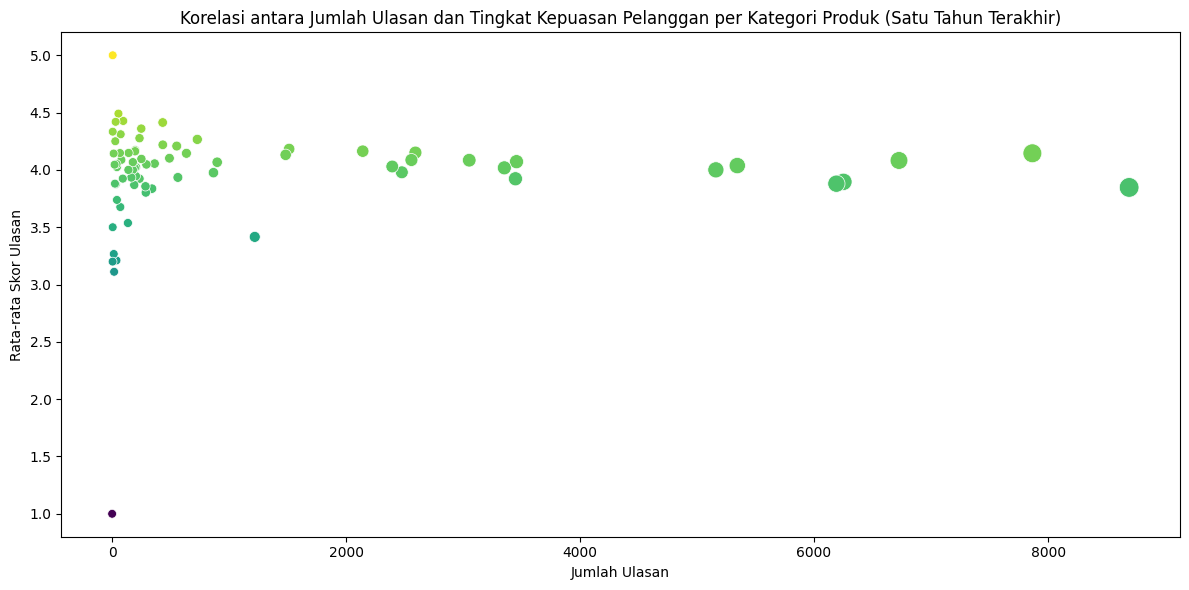

0.055484592405868546

In [ ]:
reviews_per_category = reviews_per_category.sort_values(by='review_id', ascending=False)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=reviews_per_category, x='review_id', y='review_score', size='review_id', sizes=(40, 200), hue='review_score', palette='viridis', legend=False)
plt.title('Korelasi antara Jumlah Ulasan dan Tingkat Kepuasan Pelanggan per Kategori Produk (Satu Tahun Terakhir)')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Rata-rata Skor Ulasan')
plt.tight_layout()
plt.show()

correlation_value = reviews_per_category['review_id'].corr(reviews_per_category['review_score'])
correlation_value

- Korelasi Lemah: Korelasi rendah (0.055) menunjukkan tidak ada hubungan signifikan antara jumlah ulasan dan skor kepuasan.

- Sebaran Data: Kebanyakan kategori memiliki ulasan rendah dengan skor 3 hingga 4.5.

- Anomali: Beberapa kategori dengan ulasan sedikit memiliki skor ekstrem (1 atau 5), menunjukkan variasi pengalaman pelanggan.



### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

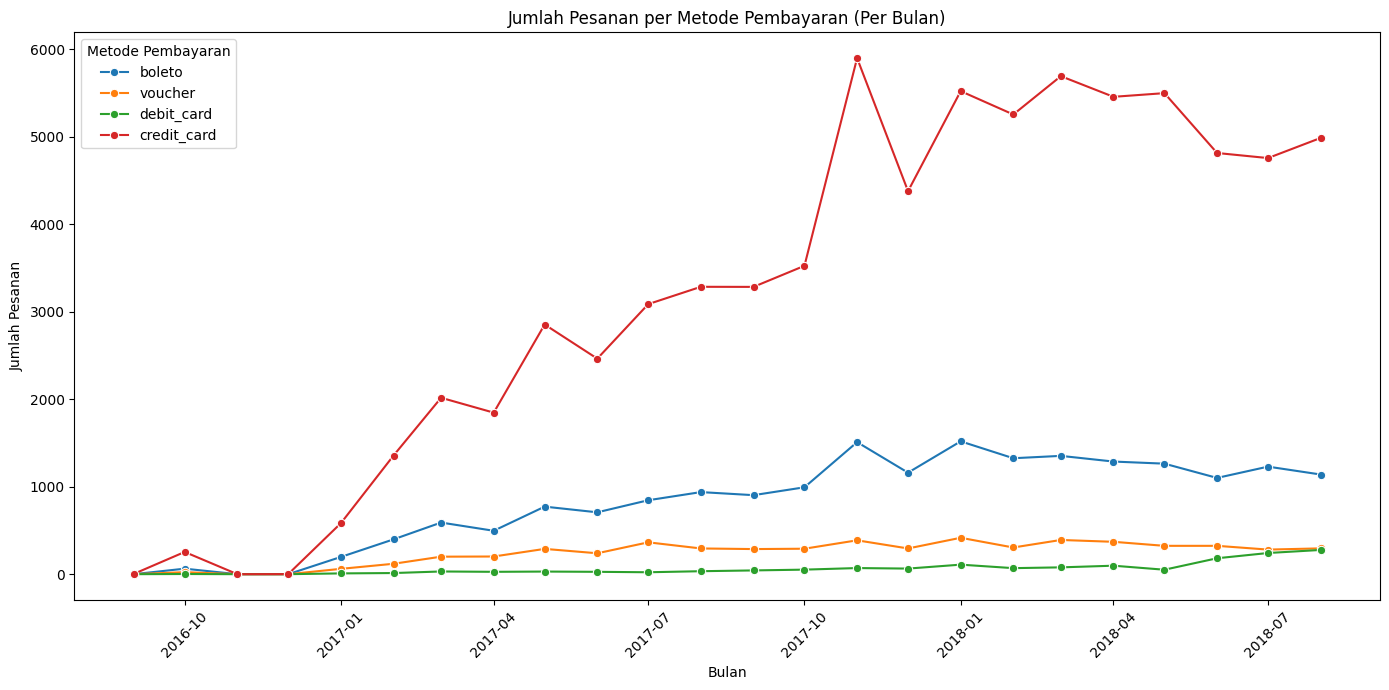

In [ ]:
filtered_payments_per_method_month['order_month'] = pd.to_datetime(filtered_payments_per_method_month['order_month'])

filtered_payments_per_method_month = filtered_payments_per_method_month.sort_values('order_month')

filtered_payments_per_method_month.to_csv('filtered_payments_per_method_month')
plt.figure(figsize=(14, 7))

sns.lineplot(data=filtered_payments_per_method_month, x='order_month', y='order_id', hue='payment_type', marker='o')

plt.title('Jumlah Pesanan per Metode Pembayaran (Per Bulan)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)

plt.legend(title='Metode Pembayaran')

plt.tight_layout()
plt.show()

**Insight:**
- Credit Card Dominan: Penggunaan credit card meningkat tajam dan konsisten, terutama sejak pertengahan 2017.

- Boleto Stabil: Metode boleto mengalami pertumbuhan bertahap tetapi stabil.

- Metode Lain Rendah: Debit card dan voucher memiliki jumlah pesanan rendah dan cenderung stabil.

- Pola Signifikan: Hanya credit card yang menunjukkan pola peningkatan signifikan; metode lain relatif stabil tanpa pola musiman.

Pola yang paling signifikan terlihat pada penggunaan credit card, yang mengalami peningkatan konsisten dan signifikan dari bulan ke bulan. Tidak ada pola musiman yang jelas terlihat pada metode pembayaran lainnya seperti boleto, debit card, atau voucher, yang cenderung lebih stabil dengan sedikit variasi.

### Pertanyaan 3

<ipython-input-198-85613cd5fdf2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name', y='average_shipping_time_days', data=top_10_fastest_shipping, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn

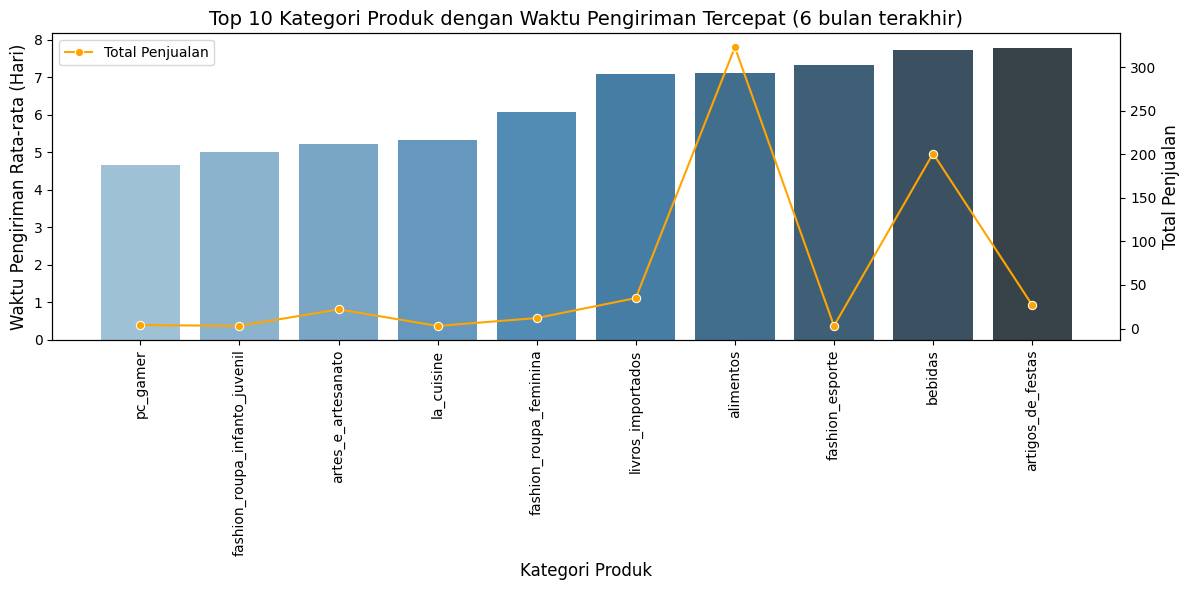

In [ ]:
top_10_fastest_shipping = result.sort_values(by='average_shipping_time_days').head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x='product_category_name', y='average_shipping_time_days', data=top_10_fastest_shipping, palette='Blues_d')

plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Waktu Pengiriman Rata-rata (Hari)', fontsize=12)
plt.title('Top 10 Kategori Produk dengan Waktu Pengiriman Tercepat (6 bulan terakhir)', fontsize=14)
plt.xticks(rotation=90)

ax2 = plt.twinx()
sns.lineplot(x='product_category_name', y='total_sales', data=top_10_fastest_shipping, color='orange', marker="o", label='Total Penjualan')

ax2.set_ylabel('Total Penjualan', fontsize=12)
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

- Kategori dengan Pengiriman Tercepat: Pc_gamer memiliki waktu pengiriman rata-rata tercepat, kurang dari 2 hari. Diikuti oleh fashion_roupa_infanto_juvenil dan artes_e_artesanato yang juga memiliki waktu pengiriman cepat.

- Jumlah Penjualan dan Pengiriman: Kategori dengan waktu pengiriman yang cepat seperti pc_gamer dan fashion_roupa_infanto_juvenil memiliki jumlah penjualan yang relatif rendah. Sebaliknya, kategori dengan waktu pengiriman lebih lama seperti alimentos dan bebidas justru memiliki jumlah penjualan yang lebih tinggi.

- Hubungan Pengiriman dan Penjualan: Tidak ada korelasi yang jelas antara waktu pengiriman cepat dengan jumlah penjualan. Beberapa kategori dengan waktu pengiriman lebih lama justru memiliki penjualan yang lebih besar, sementara kategori dengan pengiriman cepat memiliki penjualan yang lebih sedikit.

## Analisis Lanjutan (Opsional)

-

## Conclusion

- Korelasi antara jumlah ulasan dan tingkat kepuasan pelanggan per kategori produk dalam satu tahun terakhir: </br>
Berdasarkan grafik pertama, terdapat korelasi lemah antara jumlah ulasan dan tingkat kepuasan pelanggan. Produk dengan sedikit ulasan cenderung memiliki variasi yang besar pada rata-rata skor ulasannya, tetapi produk dengan ulasan yang lebih banyak memiliki rata-rata skor yang lebih stabil di kisaran tinggi (4.0-4.5). Ini menunjukkan bahwa jumlah ulasan tidak selalu berbanding lurus dengan kepuasan pelanggan, namun semakin banyak ulasan, rata-rata skor cenderung lebih konsisten.

- Pola signifikan dalam metode pembayaran yang memengaruhi jumlah pembelian per bulan:</br>
Grafik kedua menunjukkan bahwa metode pembayaran dengan kartu kredit (credit_card) mendominasi jumlah pesanan dari waktu ke waktu, dengan peningkatan signifikan terutama di awal tahun 2017. Pola ini menunjukkan bahwa konsumen cenderung menggunakan kartu kredit lebih sering, terutama ketika jumlah pembelian meningkat. Di sisi lain, metode pembayaran lain seperti boleto dan voucher memiliki pola yang lebih stabil dan tidak menunjukkan lonjakan yang signifikan.

- Kategori produk dengan waktu pengiriman tercepat dan dampaknya terhadap penjualan: </br>
Dari grafik ketiga, kategori "pc_gamer" memiliki waktu pengiriman rata-rata tercepat, sekitar 4 hari. Namun, penjualan kategori ini tidak tinggi dibandingkan kategori lain seperti "alimentos" dan "bebidas." Kategori "alimentos" memiliki penjualan tertinggi, meskipun waktu pengirimannya sedikit lebih lama (sekitar 6 hari). Ini menunjukkan bahwa meskipun waktu pengiriman cepat dapat memengaruhi kepuasan pelanggan, faktor-faktor lain seperti permintaan produk juga berperan besar dalam meningkatkan penjualan.

</br>
Secara keseluruhan, pola yang terlihat menunjukkan bahwa tingkat kepuasan pelanggan tidak selalu berkorelasi dengan jumlah ulasan, metode pembayaran dengan kartu kredit memengaruhi jumlah pesanan secara signifikan, dan waktu pengiriman cepat tidak selalu langsung berpengaruh terhadap volume penjualan, tergantung pada kategori produknya.
